**Aim of this notebook :** simulate an optic lens using only the famous Snell Descartes formula. Observe the property of approximate stigmatism (the fact that each object point admits a conjugate point, whether real or virtual), valid when the optical system and light rays satisfy Gaussian conditions. Check that the resulting lens satisfies Descartes' formula for thin lenses.

Libraries :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Lens settings :

---
Settings : c (unit: centimeters, default value = 20)

In [ ]:
# Point C : center of the circle on the left side of the lens
c=20
C = (c, 0)
# Point C prime : center of the circle on the right side of the lens
C_prime = (-c,0)
C_prime=np.array(C_prime)
# Radius of left lens circle
r = c+0.15
# Choosing points on the left surface of the lens
# selected ordinates
y_values = np.array([-0.9, -0.1, -0.05, 0, 0.05, 0.1, 0.9]) * np.sqrt(r**2 - c**2)
print(y_values)
# Calculating the corresponding x-values
x_values = []
for y in y_values:
    x = c - math.sqrt(r**2 - y**2)
    x_values.append(x)
x_values_rounded = [round(x, 4) for x in x_values]
y_values_rounded = [round(y, 4) for y in y_values]
# points on the left lens surface
points = list(zip(x_values_rounded, y_values_rounded))


[-2.20867041 -0.24540782 -0.12270391  0.          0.12270391  0.24540782
  2.20867041]


# Converging lens used as a magnifying glass

Radius display options and object point selection :

---
Settings : inc (True), geo (True), A (default value = np.array([-5, -1])), xliml (default value = -8), xlimr (default value = 3), ylimd (default value = -5), ylimu (default value = 5)


In [ ]:
# display point A and incident rays
inc=True
# display point A' and geometric extensions of outgoing rays
geo=True
# Graphics setting
xliml, xlimr = -8,3
ylimd, ylimu = -5,5
# Point A
A = np.array([-5, -1])
# Calculation of point A' using theoretical formulas (see Stigmatism.pdf)
# Focal (inverse of vergence) distance estimated using Lensmaker formula
# Abscissa of A' calculated using Descartes' conjugation formula
# A' ordinate calculated from the magnification formula and A' abscissa
A_prime = np.array([1/(4.96+1/(0.01*A[0]))*100,0])  # Descartes
A_prime[1]=A[1]*A_prime[0]/A[0]  # Transversal magnification

Core program :

<ipython-input-99-98e0eed449d2>:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(A[0], A[1], 'ro', color="black")
<ipython-input-99-98e0eed449d2>:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(I[0], I[1], 'ro', color=colors[k],label='Point K' if k == 0 else "")
<ipython-input-99-98e0eed449d2>:98: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(J[0], J[1], 'ro', color=colors[k],label='Point J' if k == 0 else "")
<ipython-input-99-98e0eed449d2>:104: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(A_prime[0], 

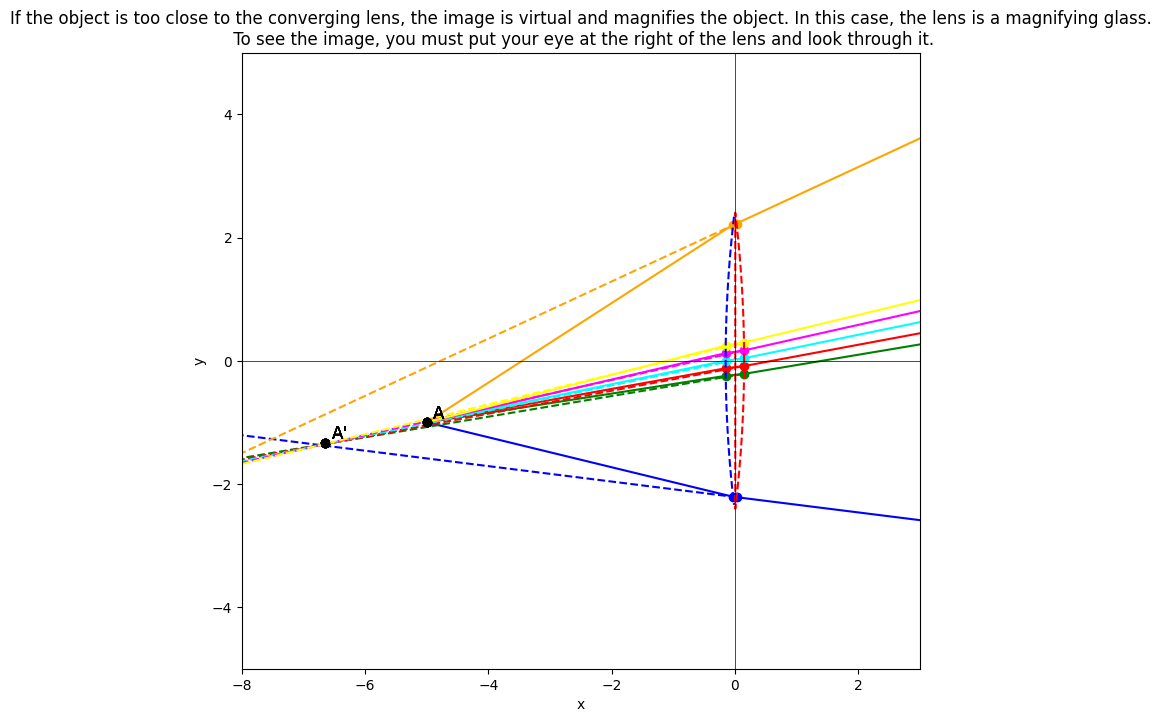

In [ ]:
def snell_descartes(v, n, n1, n2):
    v = np.array(v)
    n = np.array(n)
    v=np.squeeze(v)
    n=np.squeeze(n)
    v=v / np.linalg.norm(v)
    n=n / np.linalg.norm(n)

    m=np.array([n[1],-n[0]])
    m=np.squeeze(m)

    w=-np.sqrt(1-(n1*np.dot(v,m)/n2)**2)*n+(n1/n2)*np.dot(v,m)*m   # detailed calculation is done in Stigmatism.pdf
    return w / np.linalg.norm(w)

def intersect_with_circle(center, radius, w, K0):
    w = w / np.linalg.norm(w)
    a = np.dot(w, w)
    b = 2 * np.dot(w, K0 - center)
    c = np.dot(K0 - center, K0 - center) - radius**2
    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return None

    sqrt_discriminant = np.sqrt(discriminant)
    t1 = (-b - sqrt_discriminant) / (2 * a)
    t2 = (-b + sqrt_discriminant) / (2 * a)

    K1 = K0 + t1 * w
    K2 = K0 + t2 * w

    return K2

def refract_and_trace(I, v, n, glass_index=1.5):
    n_air = 1.0
    n_glass = glass_index

    # Calculating the refracted vector at the lens entrance
    w = snell_descartes(v, n, n_air, n_glass)

    J = intersect_with_circle(C_prime, r, w, I)

    # Calculation of the KC' vector and its normalization
    JC_prime = C_prime - J
    JC_prime_normalized = JC_prime / np.linalg.norm(JC_prime)

    # Calculating the refracted vector at the lens outlet
    z = snell_descartes(w, JC_prime_normalized, n_glass, n_air)

    # Save segment [IJ]
    IJ = np.array([I, J])

    # Calculating half-straight lines
    t = np.linspace(0, 10, 100)
    d = J[:, np.newaxis] + t * z[:, np.newaxis]
    dpoint = J[:, np.newaxis] - t * z[:, np.newaxis]

    return IJ, J, np.array(d), np.array(dpoint)

def normalize_vector(vector):
    magnitude = math.sqrt(vector[0]**2 + vector[1]**2)
    return (vector[0] / magnitude, vector[1] / magnitude)

# Calculation of normalized vectors IC for each point I
normalized_vectors = []
for I in points:
    vector_IC = (I[0] - C[0], I[1] - C[1])
    normalized_vector_IC = normalize_vector(vector_IC)
    normalized_vectors.append(normalized_vector_IC)

plt.figure(figsize=(10, 8))

colors = ['blue','green','red','cyan','magenta','yellow','orange','purple','pink','brown']

for k in range(0, 7):
    I = points[k]
    vector_AI = np.array([I[0] - A[0], I[1] - A[1]])
    normalized_vector_AI = vector_AI / np.linalg.norm(vector_AI)
    IJ, J, d, point = refract_and_trace(points[k], normalized_vector_AI, normalized_vectors[k])

    # Display segment [AI]
    if inc:
      AI=np.array([A,I])
      plt.plot(AI[:, 0], AI[:, 1], color=colors[k],label=f'Segment AI {k+1}' if k == 0 else "")

    # Display segment [IJ]
    plt.plot(IJ[:, 0], IJ[:, 1], color=colors[k])

    # display of A
    if inc:
      plt.plot(A[0], A[1], 'ro', color="black")
      plt.text(A[0] + 0.1, A[1], 'A', fontsize=12, verticalalignment='bottom', horizontalalignment='left',color="black")

    # display of I
    plt.plot(I[0], I[1], 'ro', color=colors[k],label='Point K' if k == 0 else "")

    # display of J
    plt.plot(J[0], J[1], 'ro', color=colors[k],label='Point J' if k == 0 else "")

    # display of outgoing beams
    plt.plot(d[0, :], d[1, :], color=colors[k])

    if geo:
      plt.plot(A_prime[0], A_prime[1], 'ro', color="black")
      plt.text(A_prime[0] + 0.1, A_prime[1], 'A\'', fontsize=12, verticalalignment='bottom', horizontalalignment='left',color="black")

    # dotted line display
    if geo:
      plt.plot(point[0, :], point[1, :], color=colors[k], linestyle='--')


center_blue = np.array([20, 0])
center_red = np.array([-20, 0])
theta = np.linspace(0, 2 * np.pi, 1000)
x_blue = center_blue[0] + r * np.cos(theta)
y_blue = center_blue[1] + r * np.sin(theta)
x_blue_left = x_blue[x_blue < 0]
y_blue_left = y_blue[x_blue < 0]
x_red = center_red[0] + r * np.cos(theta)
y_red = center_red[1] + r * np.sin(theta)
x_red_right = x_red[x_red > 0]
y_red_right = y_red[x_red > 0]
plt.plot(x_blue_left, y_blue_left, 'b--')
plt.plot(x_red_right, y_red_right, 'r--')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(xliml, xlimr)
plt.ylim(ylimd, ylimu)
plt.xlabel('x')
plt.ylabel('y')
plt.title('If the object is too close to the converging lens, the image is virtual and magnifies the object. In this case, the lens is a magnifying glass.\n To see the image, you must put your eye at the right of the lens and look through it.')
plt.show()

**Observation:** all rays making small angles with the optical axis (line with equation $y=0$) and passing through point A (which is close to the optical axis) virtually pass through point A'. On the other hand, the two rays passing close to the edges of the lens do not converge towards A'.

**Interpretation:** rays passing through a point A close to the optical axis and making small angles with the optical axis are called “paraxial rays”. Moreover, when the lens is thin, paraxial rays are said to satisfy Gaussian conditions. When these conditions are met, all rays converge at a second point called A': this is the conjugate of A, and can be calculated using Descartes' formula (abscissa) and the magnification formula (ordinates). When every ray passing through A also passes through A', the lens is said to be a **“stigmatic”** device. In practice, there's only one perfectly stigmatic device: the mirror. When Gaussian conditions are met, the lens is **“approximately stigmatic”**.

# Forming a real image with a converging lens

Radius display options and object point selection :

---
Settings : inc (True), geo (True), A (default value = np.array([-5, -1])), xliml (default value = -8), xlimr (default value = 3), ylimd (default value = -5), ylimu (default value = 5)

In [ ]:
# display point A and incident rays
inc=True
# display point A'
geo=True
# Graphics setting
xliml, xlimr = -32,60
ylimd, ylimu = -5,5
# Point A
A = np.array([-31, -1])
# Calculation of point A' using theoretical formulas (see Stigmatism.pdf)
# Focal (inverse of vergence) distance estimated using Lensmaker formula
# Abscissa of A' calculated using Descartes' conjugation formula
# A' ordinate calculated from the magnification formula and A' abscissa
A_prime = np.array([1/(4.96+1/(0.01*A[0]))*100,0])  # Descartes
A_prime[1]=A[1]*A_prime[0]/A[0]  # Transversal magnification

Core program :

<ipython-input-125-77dd9a3a5223>:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(A[0], A[1], 'ro', color="black")
<ipython-input-125-77dd9a3a5223>:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(I[0], I[1], 'ro', color=colors[k],label='Point K' if k == 0 else "")
<ipython-input-125-77dd9a3a5223>:98: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(J[0], J[1], 'ro', color=colors[k],label='Point J' if k == 0 else "")
<ipython-input-125-77dd9a3a5223>:104: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(A_prime[

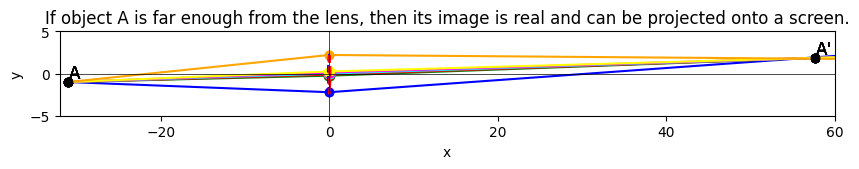

In [ ]:
def snell_descartes(v, n, n1, n2):
    v = np.array(v)
    n = np.array(n)
    v=np.squeeze(v)
    n=np.squeeze(n)
    v=v / np.linalg.norm(v)
    n=n / np.linalg.norm(n)

    m=np.array([n[1],-n[0]])
    m=np.squeeze(m)

    w=-np.sqrt(1-(n1*np.dot(v,m)/n2)**2)*n+(n1/n2)*np.dot(v,m)*m   # detailed calculation is done in Stigmatism.pdf
    return w / np.linalg.norm(w)

def intersect_with_circle(center, radius, w, K0):
    w = w / np.linalg.norm(w)
    a = np.dot(w, w)
    b = 2 * np.dot(w, K0 - center)
    c = np.dot(K0 - center, K0 - center) - radius**2
    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return None

    sqrt_discriminant = np.sqrt(discriminant)
    t1 = (-b - sqrt_discriminant) / (2 * a)
    t2 = (-b + sqrt_discriminant) / (2 * a)

    K1 = K0 + t1 * w
    K2 = K0 + t2 * w

    return K2

def refract_and_trace(I, v, n, glass_index=1.5):
    n_air = 1.0
    n_glass = glass_index

    # Calculating the refracted vector at the lens entrance
    w = snell_descartes(v, n, n_air, n_glass)

    J = intersect_with_circle(C_prime, r, w, I)

    # Calculation of the KC' vector and its normalization
    JC_prime = C_prime - J
    JC_prime_normalized = JC_prime / np.linalg.norm(JC_prime)

    # Calculating the refracted vector at the lens outlet
    z = snell_descartes(w, JC_prime_normalized, n_glass, n_air)

    # Save segment [IJ]
    IJ = np.array([I, J])

    # Calculating half-straight lines
    t = np.linspace(0, 1000, 10000)
    d = J[:, np.newaxis] + t * z[:, np.newaxis]
    dpoint = J[:, np.newaxis] - t * z[:, np.newaxis]

    return IJ, J, np.array(d), np.array(dpoint)

def normalize_vector(vector):
    magnitude = math.sqrt(vector[0]**2 + vector[1]**2)
    return (vector[0] / magnitude, vector[1] / magnitude)

# Calculation of normalized vectors IC for each point I
normalized_vectors = []
for I in points:
    vector_IC = (I[0] - C[0], I[1] - C[1])
    normalized_vector_IC = normalize_vector(vector_IC)
    normalized_vectors.append(normalized_vector_IC)

plt.figure(figsize=(10, 50))

colors = ['blue','green','red','cyan','magenta','yellow','orange','purple','pink','brown']

for k in range(0, 7):
    I = points[k]
    vector_AI = np.array([I[0] - A[0], I[1] - A[1]])
    normalized_vector_AI = vector_AI / np.linalg.norm(vector_AI)
    IJ, J, d, point = refract_and_trace(points[k], normalized_vector_AI, normalized_vectors[k])

    # Display segment [AI]
    if inc:
      AI=np.array([A,I])
      plt.plot(AI[:, 0], AI[:, 1], color=colors[k],label=f'Segment AI {k+1}' if k == 0 else "")

    # Display segment [IJ]
    plt.plot(IJ[:, 0], IJ[:, 1], color=colors[k])

    # display of A
    if inc:
      plt.plot(A[0], A[1], 'ro', color="black")
      plt.text(A[0] + 0.1, A[1], 'A', fontsize=12, verticalalignment='bottom', horizontalalignment='left',color="black")

    # display of I
    plt.plot(I[0], I[1], 'ro', color=colors[k],label='Point K' if k == 0 else "")

    # display of J
    plt.plot(J[0], J[1], 'ro', color=colors[k],label='Point J' if k == 0 else "")

    # display of outgoing beams
    plt.plot(d[0, :], d[1, :], color=colors[k])

    if geo:
      plt.plot(A_prime[0], A_prime[1], 'ro', color="black")
      plt.text(A_prime[0] + 0.1, A_prime[1], 'A\'', fontsize=12, verticalalignment='bottom', horizontalalignment='left',color="black")



center_blue = np.array([20, 0])
center_red = np.array([-20, 0])
theta = np.linspace(0, 2 * np.pi, 1000)
x_blue = center_blue[0] + r * np.cos(theta)
y_blue = center_blue[1] + r * np.sin(theta)
x_blue_left = x_blue[x_blue < 0]
y_blue_left = y_blue[x_blue < 0]
x_red = center_red[0] + r * np.cos(theta)
y_red = center_red[1] + r * np.sin(theta)
x_red_right = x_red[x_red > 0]
y_red_right = y_red[x_red > 0]
plt.plot(x_blue_left, y_blue_left, 'b--')
plt.plot(x_red_right, y_red_right, 'r--')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(xliml, xlimr)
plt.ylim(ylimd, ylimu)
plt.xlabel('x')
plt.ylabel('y')
plt.title('If object A is far enough from the lens, then its image is real and can be projected onto a screen.')
plt.show()